### Test on Genetic Algorithm

using DEAP (https://github.com/DEAP/deap)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms

%matplotlib inline

In [2]:
def function_to_evaluate(ind):
    # just a summation
    
    # ind[0] is problematic MS
    # ind[1] and ind[2] are best MS
    # ind[3] is MS that can be ignored
    # ind[4:] are typical MS
    
    return -0.5*ind[0] + 2*ind[1] + 3*ind[2] + 0*ind[3] + sum(ind[4:]),

In [3]:
# we can use more than one 'function' as a fitness test 
# and give a weight to that function
# in here we only use one function, -> RMS as a functin of weight

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [4]:
toolbox = base.Toolbox()

toolbox.register("attr_bool", random.random) # uniform random 0 to 1 as 'individu generator'

# number of parameter (10 MS)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", function_to_evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

In [5]:
def main(number_of_pop=39, number_of_generation=10, mutpb=0.2):
    pop = toolbox.population(n=number_of_pop)
    
    # wanted solution = creator.Individual([0, 1, 1, 0, 1, 1, 1, 1, 1, 1]) # fitness = 11
    
    # insert a "woho" -> best guest
    some_woho_individual = creator.Individual([0.1, 0.8, 0.8, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
    pop.append(some_woho_individual)
    
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=mutpb, ngen=number_of_generation, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg    	min    	max   
0  	40    	5.14796	2.84038	7.4714
1  	24    	5.87679	3.31792	7.4714
2  	29    	6.55312	3.18906	7.79573
3  	25    	7.27475	6.09899	8.16471
4  	18    	7.64   	6.81679	8.53681
5  	24    	7.69619	3.93502	9.2137 
6  	24    	8.11252	6.672  	9.2137 
7  	28    	8.36572	7.05854	9.2137 
8  	25    	8.50217	4.99726	9.37286
9  	17    	8.90726	7.91224	9.37286
10 	22    	9.10699	7.70835	9.37286
Best individual is: [0.0, 0.752672863676523, 0.9868292261767065, 0.0, 0.9418453879299042, 0.9462613655621491, 0.6693596129472936, 0.5, 0.9112460882960852, 0.9383092562259157]
with fitness: (9.372855116844512,)


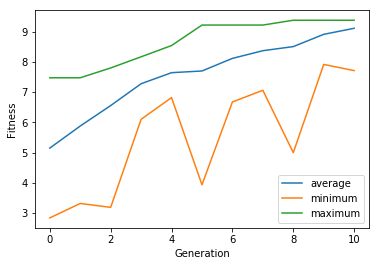

In [6]:
pop, log, hof = main(39, 10)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

### Test to see the influence of the number of individual in a population and the number of generation (GA iteration)

With the same number of total evaluation = 400

gen	nevals	avg    	min    	max 
0  	10    	5.40248	3.80372	6.95
1  	7     	6.88221	6.27615	7.55171
2  	5     	7.07349	6.45   	7.55171
3  	7     	6.92571	3.33181	7.55171
4  	5     	7.09283	5.29352	7.86269
5  	9     	7.48605	6.15208	8.01462
6  	6     	7.70786	6.23715	8.01462
7  	8     	7.78451	6.59678	8.01462
8  	8     	7.95571	7.27844	8.1617 
9  	6     	8.08816	8.01462	8.1617 
10 	8     	8.04441	7.28295	8.1617 
11 	7     	7.86743	5.68295	8.1617 
12 	8     	8.11531	7.69773	8.1617 
13 	8     	7.9217 	5.7617 	8.1617 
14 	6     	8.1617 	8.1617 	8.1617 
15 	4     	7.78743	4.88295	8.1617 
16 	5     	7.9217 	5.7617 	8.1617 
17 	9     	7.66368	5.68295	8.1617 
18 	6     	8.1617 	8.1617 	8.1617 
19 	5     	7.24142	3.99968	8.1617 
20 	8     	7.68581	5.66023	8.1617 
21 	7     	8.11531	7.69773	8.1617 
22 	6     	8.05828	7.12747	8.1617 
23 	6     	7.83383	5.7617 	8.1617 
24 	6     	8.10992	7.64384	8.1617 
25 	5     	7.94992	6.04384	8.1617 
26 	6     	8.1617 	8.1617 	8.1617 
27 	6     	8.11007	7.64534

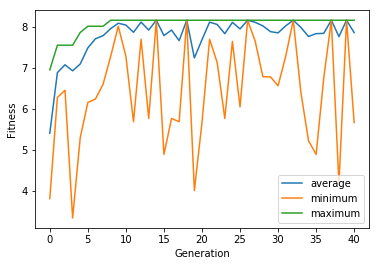

In [7]:
pop, log, hof = main(9, 40)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg    	min    	max 
0  	20    	5.20859	3.30743	6.95
1  	9     	6.2488 	4.55   	7.1193
2  	12    	6.70551	3.50202	7.95104
3  	15    	6.69148	4.2193 	8.15787
4  	6     	7.27435	6.65156	8.15787
5  	11    	7.33365	6.45062	8.15787
6  	16    	7.7247 	6.6193 	8.46778
7  	7     	8.13106	7.32421	8.51778
8  	15    	8.13572	6.55787	8.55552
9  	8     	8.01005	5.6549 	8.55552
10 	10    	8.38657	7.68983	8.55552
11 	12    	8.52787	8.46778	8.55552
12 	12    	8.30996	5.37757	8.55552
13 	14    	8.02322	4.48788	8.55552
14 	9     	8.38552	6.15552	8.55552
15 	14    	8.53052	8.05552	8.55552
16 	11    	8.48841	7.71347	8.55552
17 	11    	8.46002	6.64561	8.55552
18 	11    	8.0346 	3.46766	8.55552
19 	12    	8.55552	8.55552	8.55552
20 	10    	8.24453	6.15552	8.55552
Best individual is: [0.0, 0.9549542415070718, 0.8, 0.1, 0.6726480652139712, 0.7779467906721668, 0.8420456380395023, 0.9529672580976644, 0.5, 0.5]
with fitness: (8.555516235037448,)


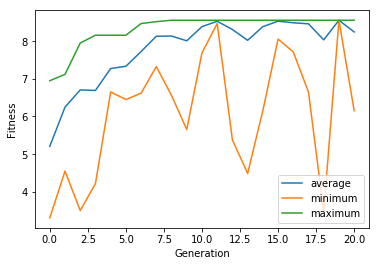

In [8]:
pop, log, hof = main(19, 20)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg    	min    	max    
0  	80    	5.26391	2.35083	7.97135
1  	43    	6.62112	4.21071	8.39431
2  	44    	7.35598	4.53132	9.14531
3  	53    	7.76753	6.32974	8.86454
4  	52    	8.11843	5.38407	9.32957
5  	41    	8.45238	7.08675	9.50307
Best individual is: [0.22401034251965968, 0.8646447173119975, 0.8981324294520769, 0.0, 0.716690183383169, 0.9598419930958796, 0.9346525787660327, 0.735428104975586, 0.8572005183193593, 0.9875709848191854]
with fitness: (9.503065915079608,)


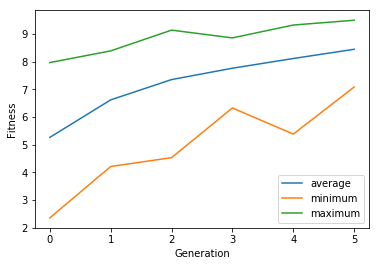

In [9]:
pop, log, hof = main(79, 5)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg    	min    	max    
0  	100   	5.22987	1.89543	7.79522
1  	60    	6.27027	3.15008	8.23808
2  	59    	7.01171	3.71877	8.64648
3  	61    	7.51487	4.72527	8.99948
4  	53    	7.97121	2.20363	9.75457
Best individual is: [0.004403867265354244, 0.9822074319297187, 0.9893654965802503, 0.053731876154601954, 0.9514753623505446, 0.687463191921876, 0.48665455249526723, 0.971508647187275, 0.7570724120871666, 0.9700850152508164]
with fitness: (9.754568601260457,)


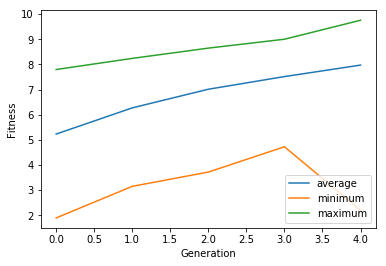

In [10]:
pop, log, hof = main(99, 4)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

Conclusion:
- number of individu in a population is more important than number of generation (GA iteration)
- initial population is important

### Test to see the influence of mutation probability


gen	nevals	avg    	min    	max    
0  	40    	5.36942	2.81057	8.59136
1  	26    	6.47023	3.82558	8.72073
2  	22    	7.1863 	5.03051	8.72073
3  	21    	7.7312 	6.37836	9.15983
4  	23    	8.19703	6.78179	9.52232
5  	20    	8.6139 	7.4088 	9.52232
6  	22    	8.95518	8.31895	9.52232
7  	8     	9.23153	8.46157	9.64514
8  	15    	9.48042	9.16812	9.80976
9  	16    	9.54906	9.40124	9.80976
10 	20    	9.61666	9.35771	9.80976
Best individual is: [0.3421752252916851, 0.8914839633749785, 0.9948587064323513, 0.5226839564826279, 0.952956491285931, 0.7468976075760663, 0.9773203634742053, 0.845340918575282, 0.9576693529407992, 0.7331170831075798]
with fitness: (9.809758250361032,)


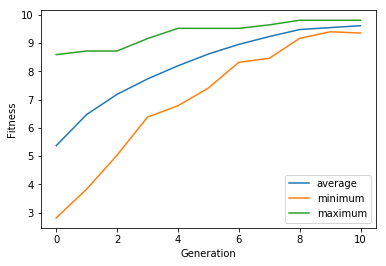

In [11]:
pop, log, hof = main(39, 10, 0.01)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg   	min    	max    
0  	40    	5.3773	3.17256	8.07738
1  	17    	6.41947	3.70076	8.28816
2  	27    	7.09445	5.4616 	8.45706
3  	16    	7.87282	6.71277	8.45706
4  	21    	8.22581	6.40706	8.77944
5  	21    	8.4083 	7.45747	8.77944
6  	21    	8.50952	6.85706	8.77944
7  	22    	8.60334	6.15712	8.77944
8  	24    	8.75526	8.45706	8.77944
9  	22    	8.74795	7.51969	8.77944
10 	19    	8.65173	4.43961	8.77944
Best individual is: [0.09869347758234792, 0.8, 0.89055566230163, 0.7345037707838556, 0.41331256780667347, 0.8306863547130886, 0.8761683378190204, 0.8464364413183874, 0.768787889688562, 0.8217297065926987]
with fitness: (8.779441546052148,)


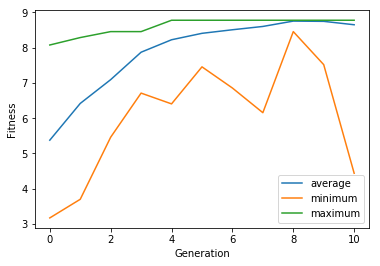

In [12]:
pop, log, hof = main(39, 10, 0.05)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg   	min    	max   
0  	40    	5.6586	2.62808	8.1274
1  	28    	6.34494	4.3451 	8.28582
2  	12    	7.10112	5.67945	8.83522
3  	27    	7.53217	4.90706	9.15988
4  	15    	8.18822	4.71323	9.66342
5  	19    	8.56443	5.96782	9.77888
6  	22    	8.97184	7.31871	9.8353 
7  	23    	9.23337	6.43292	9.94075
8  	24    	9.57122	8.15008	9.94075
9  	21    	9.76994	9.03738	10.0213
10 	21    	9.69091	6.17247	10.0213
Best individual is: [0.14841810500597685, 0.9458250039894761, 0.9557969925712055, 0.7188972720737972, 0.8696460252451889, 0.8853172875206525, 0.7999025556465806, 0.9311719069109659, 0.9015180731608128, 0.9489506314651489]
with fitness: (10.021338413138931,)


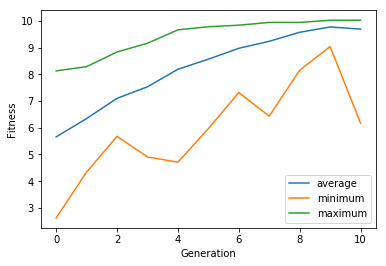

In [13]:
pop, log, hof = main(39, 10, 0.1)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg    	min    	max 
0  	40    	4.89483	1.74723	6.95
1  	26    	5.65906	3.31453	7.63437
2  	31    	6.18648	3.33372	8.52597
3  	31    	6.88708	4.005  	8.16164
4  	29    	7.2828 	3.73493	8.35531
5  	20    	7.82771	6.79017	8.45372
6  	30    	7.9862 	6.19385	8.66074
7  	29    	8.00017	5.12214	8.77478
8  	26    	8.30236	5.94657	9.27441
9  	29    	8.68108	7.53674	9.43803
10 	26    	8.88412	5.98601	9.44069
Best individual is: [0.1, 0.9612277123776571, 0.9188191433077587, 0.9090332497463327, 0.874661333371997, 0.9478914153942748, 0.8113726251007605, 0.7716687456497013, 0.8100054580451912, 0.596177485807771]
with fitness: (9.440689918048285,)


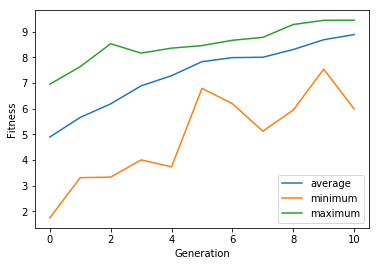

In [14]:
pop, log, hof = main(39, 10, 0.2)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg    	min    	max    
0  	40    	5.25442	2.89294	8.07049
1  	22    	6.04683	4.25504	8.07049
2  	32    	6.65015	3.05005	8.47511
3  	25    	7.25322	5.26756	8.60123
4  	28    	7.79546	5.87033	8.79038
5  	29    	8.18324	5.95035	8.93224
6  	31    	8.19578	4.66672	9.01114
7  	25    	8.26109	5.84404	9.15408
8  	21    	8.72404	8.04701	9.12454
9  	21    	8.6242 	5.37948	9.22829
10 	23    	8.76718	5.68628	9.2922 
Best individual is: [0.0, 0.9368287313202696, 0.8981742623801142, 0.22442404696106677, 0.9667461124947557, 0.955780931268931, 0.7266076976203364, 0.6933611528230167, 0.701605225511053, 0.6799151606110001]
with fitness: (9.292196530109976,)


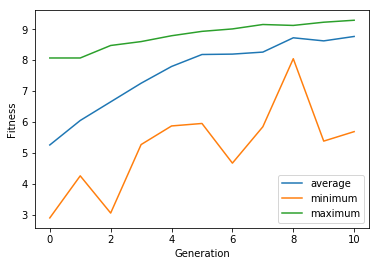

In [15]:
pop, log, hof = main(39, 10, 0.3)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

gen	nevals	avg    	min    	max    
0  	40    	5.59285	2.88039	7.52716
1  	25    	6.12967	4.05   	7.52716
2  	27    	6.72685	3.75532	8.74172
3  	34    	7.10612	4.26158	9.12068
4  	31    	7.54854	4.7722 	9.25172
5  	31    	7.95214	5.56098	9.25172
6  	31    	8.32197	6.22059	9.27685
7  	23    	8.65984	6.07542	9.3929 
8  	27    	8.59217	6.17167	9.3929 
9  	27    	8.62188	4.75563	9.65983
10 	25    	8.971  	6.24689	9.65983
Best individual is: [0.0, 0.9558223818986619, 0.7778197561491245, 0.0, 0.9064488758042909, 0.8807238741037027, 0.8314848547136044, 0.8887898627733039, 0.9841849703024877, 0.9230923006244514]
with fitness: (9.659828770566538,)


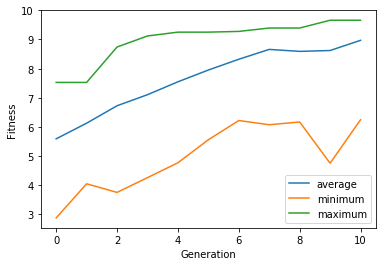

In [16]:
pop, log, hof = main(39, 10, 0.5)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

Conclusion:
+ Do not use big mutation probability
+ Small is generally better, but it is not sensitive (the effect is small)